In [145]:
import re
import nltk

# # Download NLTK resources if not already downloaded
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('vader_lexicon')


from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Dictionary mapping ticker symbols to colors
ticker_colors = {
    'TSLA': '#E82127',
    'AAPL': '#000000',
    'MSFT': '#00A4EF',
    'NVDA': '#76B900'
}
ticker_colors_05 = {
    'TSLA_05': '#E82127',
    'AAPL_05': '#000000',
    'MSFT_05': '#00A4EF',
    'NVDA_05': '#76B900'
}


In [2]:
import sqlite3
import pandas as pd
tickers = ticker_colors.keys()
# Connect to SQLite database
conn = sqlite3.connect('stock_data.db')
# df_combined = {}


# def check_table_exists(table_name):
#     cursor = conn.cursor()
#     cursor.execute(f"SELECT name FROM sqlite_master WHERE type='table' AND name='{table_name}'")
#     result = cursor.fetchone()
#     return result

# for ticker in tickers:
#     table_name = f"tweets_{ticker}_processed"
#     print(f"Processing {ticker}...")
#     add_to_df = False

#     if check_table_exists(table_name):
#         # Read data from tweets_NVDA table into DataFrame
#         tweets_df = pd.read_sql_query(f"SELECT '{ticker}' as Symbol, Body, CreatedAt, Sentiment, CleanBody, Date(CreatedAt) as Date FROM tweets_{ticker}_processed WHERE CreatedAt>='2023-01-01 00:00:00' and CreatedAt<='2024-03-16 00:00:00'", conn)
#         process_tweet = True
#         add_to_df = True
#     else:
#         print(f"I AM HERE...{ticker}")
#         table_name = f"tweets_{ticker}"
#         if check_table_exists(table_name):
#             tweets_df = pd.read_sql_query(f"SELECT * FROM tweets_{ticker}", conn)
#             # print(tweets_df['Symbol'].value_counts())
#             tweets_df['Symbol'] = ticker
#             process_tweet = False
#             add_to_df = True

#     if add_to_df: 
#         df_combined[ticker] = tweets_df, process_tweet
#         print(tweets_df['Symbol'].value_counts())
    

In [3]:
# import pandas as pd
# tweets_df["Date"] = pd.to_datetime(tweets_df["Date"])
# tweets_df.info()


In [4]:
# import pandas as pd
# dfs = []
# # Create a SentimentIntensityAnalyzer object
# analyzer = SentimentIntensityAnalyzer()


# positive_words='buy^bull^long^support^undervalued^underpriced^cheap^upward^rising^trend^moon^rocket^hold^breakout^call^beat^support^buying^holding' \
#                 '^high^profit^win^bull run^growth potential^value buy^breakthrough^optimistic^expansion^surge^outperform^buy signal^high reward'
# negative_words='sell^bear^bubble^bearish^short^overvalued^overbought^overpriced^expensive^downward^falling^sold^sell^low^put^miss^resistance^squeeze'  \
#     '^cover^seller^downgrade^slaughter^crash^volatile^risk-off^downgrade^panic selling^uncertainty^loss-making^^weakness^correction^slump^sell signal'

# dictOfpos = { i : 4 for i in positive_words.split("^") }
# dictOfneg = { i : -4 for i in negative_words.split("^")  }
# Financial_Lexicon = {**dictOfpos, **dictOfneg}

# analyzer.lexicon.update(Financial_Lexicon)

# for ticker in tickers:
#     df , process_tweet = df_combined[ticker]
#     if not process_tweet:
#         print(f"Processing ticker : {ticker}")

#         # Initialize WordNet lemmatizer and stopwords
#         lemmatizer = WordNetLemmatizer()
#         stop_words = set(stopwords.words('english'))

#         def clean_text(row):
#             # A list of contractions from http://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python
#             contractions = { 
#                 "ain't": "am not",
#                 "aren't": "are not",
#                 "can't": "cannot",
#                 "can't've": "cannot have",
#                 "'cause": "because",
#                 "could've": "could have",
#                 "couldn't": "could not",
#                 "couldn't've": "could not have",
#                 "didn't": "did not",
#                 "doesn't": "does not",
#                 "don't": "do not",
#                 "hadn't": "had not",
#                 "hadn't've": "had not have",
#                 "hasn't": "has not",
#                 "haven't": "have not",
#                 "he'd": "he would",
#                 "he'd've": "he would have",
#                 "he'll": "he will",
#                 "he's": "he is",
#                 "how'd": "how did",
#                 "how'll": "how will",
#                 "how's": "how is",
#                 "i'd": "i would",
#                 "i'll": "i will",
#                 "i'm": "i am",
#                 "i've": "i have",
#                 "isn't": "is not",
#                 "it'd": "it would",
#                 "it'll": "it will",
#                 "it's": "it is",
#                 "let's": "let us",
#                 "ma'am": "madam",
#                 "mayn't": "may not",
#                 "might've": "might have",
#                 "mightn't": "might not",
#                 "must've": "must have",
#                 "mustn't": "must not",
#                 "needn't": "need not",
#                 "oughtn't": "ought not",
#                 "shan't": "shall not",
#                 "sha'n't": "shall not",
#                 "she'd": "she would",
#                 "she'll": "she will",
#                 "she's": "she is",
#                 "should've": "should have",
#                 "shouldn't": "should not",
#                 "that'd": "that would",
#                 "that's": "that is",
#                 "there'd": "there had",
#                 "there's": "there is",
#                 "they'd": "they would",
#                 "they'll": "they will",
#                 "they're": "they are",
#                 "they've": "they have",
#                 "wasn't": "was not",
#                 "we'd": "we would",
#                 "we'll": "we will",
#                 "we're": "we are",
#                 "we've": "we have",
#                 "weren't": "were not",
#                 "what'll": "what will",
#                 "what're": "what are",
#                 "what's": "what is",
#                 "what've": "what have",
#                 "where'd": "where did",
#                 "where's": "where is",
#                 "who'll": "who will",
#                 "who's": "who is",
#                 "won't": "will not",
#                 "wouldn't": "would not",
#                 "you'd": "you would",
#                 "you'll": "you will",
#                 "you're": "you are"
#             }

#             # Steps:
#             # 1. Lowercase words (for uncased GloVe Embeddings)
#             # 2. Replace contractions with longer form (from the contractions dictionary)
#             # 3. Replace and remove non-word characters (symbols)
#             # 4. Remove stop words
            
#             # Lowercase words
#             text = row.lower()
            
#             # Replace contractions with longer form
#             text = text.split()
#             expanded_text = []
#             for word in text:
#                 if word in contractions:
#                     expanded_text.append(contractions[word])
#                 else:
#                     expanded_text.append(word)
#             text = " ".join(expanded_text)
            
#             # Format words and remove non-word characters
#             text = re.sub(r'b\"', '', text)
#             text = re.sub(r'b\'', '', text)
#             text = re.sub(r'&amp;', '', text) 
#             text = re.sub(r'0,0', '00', text) 
#             text = re.sub(r'[_"\-;%()|.,+&=*%.,!?:#@\[\]<>]', ' ', text)
#             text = re.sub(r'\'', ' ', text)
#             text = re.sub(r'\$', ' $ ', text)
#             text = re.sub(r'u s ', ' united states ', text)
#             text = re.sub(r'u n ', ' united nations ', text)
#             text = re.sub(r'u k ', ' united kingdom ', text)
#             text = re.sub(r'j k ', ' jk ', text)
#             text = re.sub(r' s ', ' ', text)
#             text = re.sub(r' yr ', ' year ', text)
#             text = re.sub(r' l g b t ', ' lgbt ', text)
#             text = re.sub(r'0km ', '0 km ', text)
#             # Remove URLs and HTML tags
#             text = re.sub(r'http\S+|www\S+|<.*?>', '', text)    
#             # Remove non-alphanumeric characters
#             text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

#             # Remove stop words
#             text = text.split()
#             stop_words = set(stopwords.words("english"))
#             text = [word for word in text if not word in stop_words]
            
#             # Return cleaned text
#             cleaned_text = " ".join(text)
            
#             return cleaned_text

#         # # Calculate word frequency and the size of the vocabulary
#         # def calculate_word_frequency(row, word_frequency):
            
#         #     title_text = row["Body"].split()
#         #     for word in title_text:
#         #         if word not in word_frequency:
#         #             word_frequency[word] = 1
#         #         else:
#         #             word_frequency[word] += 1
            
#         #     return word_frequency


#         # Apply preprocessing to the 'Body' column
#         df['CleanBody'] = df['Body'].apply(clean_text)

#         df.to_sql(f'tweets_{ticker}_processed', conn, if_exists='replace', index=False)
#     dfs.append(df)  


# sentiment_df = pd.concat(dfs, axis=0)
# sentiment_df.reset_index(inplace=True)

In [5]:
# sentiment_df["Date"] = pd.to_datetime(sentiment_df["Date"])
# sentiment_df.info()

In [6]:

# def get_sentiment_score(text):
#     return analyzer.polarity_scores(text)['compound']

# # Apply the sentiment analysis to the 'CleanBody' column
# sentiment_df['SentimentScore_05'] = sentiment_df['Body'].apply(get_sentiment_score)

# # Classify sentiment based on score
# def classify_sentiment(score):
#     if score >= 0.05:
#         return 'Bullish'
#     elif score <= -0.05:
#         return 'Bearish'
#     else:
#         return 'Neutral'

# # Apply sentiment classification
# sentiment_df['Sentiment_Vader_05'] = sentiment_df['SentimentScore_05'].apply(classify_sentiment)

In [7]:
# def get_sentiment_score(text):
#     return analyzer.polarity_scores(text)['compound']

# # Apply the sentiment analysis to the 'CleanBody' column
# sentiment_df['SentimentScore_5'] = sentiment_df['Body'].apply(get_sentiment_score)

# # Classify sentiment based on score
# def classify_sentiment(score):
#     if score >= 0.5:
#         return 'Bullish'
#     elif score <= -0.5:
#         return 'Bearish'
#     else:
#         return 'Neutral'

# # Apply sentiment classification
# sentiment_df['Sentiment_Vader_5'] = sentiment_df['SentimentScore_5'].apply(classify_sentiment)

In [8]:
# sentiment_df.reset_index(inplace=True)

In [9]:
# sentiment_df.to_sql('sentiment_data',conn, if_exists='replace', index=False)

In [10]:
sentiment_df = pd.read_sql_query(f"SELECT * FROM sentiment_data", conn)
sentiment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825106 entries, 0 to 1825105
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Symbol              object 
 1   Body                object 
 2   CreatedAt           object 
 3   Sentiment           object 
 4   CleanBody           object 
 5   Date                object 
 6   SentimentScore_05   float64
 7   Sentiment_Vader_05  object 
 8   SentimentScore_5    float64
 9   Sentiment_Vader_5   object 
dtypes: float64(2), object(8)
memory usage: 139.2+ MB


In [11]:
import pandas as pd
sentiment_df["Date"] = pd.to_datetime(sentiment_df["Date"])
sentiment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825106 entries, 0 to 1825105
Data columns (total 10 columns):
 #   Column              Dtype         
---  ------              -----         
 0   Symbol              object        
 1   Body                object        
 2   CreatedAt           object        
 3   Sentiment           object        
 4   CleanBody           object        
 5   Date                datetime64[ns]
 6   SentimentScore_05   float64       
 7   Sentiment_Vader_05  object        
 8   SentimentScore_5    float64       
 9   Sentiment_Vader_5   object        
dtypes: datetime64[ns](1), float64(2), object(7)
memory usage: 139.2+ MB


In [12]:
processed_df = sentiment_df
processed_df.head()

,Symbol,Body,CreatedAt,Sentiment,CleanBody,Date,SentimentScore_05,Sentiment_Vader_05,SentimentScore_5,Sentiment_Vader_5
0,TSLA,$TSLA https://www.investors.com/market-trend/s...,2023-12-06T13:50:14Z,Bullish,tsla www investors commarket trendstock market...,2023-12-06,0.0000,Neutral,0.0000,Neutral
1,TSLA,$QQQ $SPY $TSLA $NVDA ??NVIDIA WILL DELIVER NE...,2023-12-06T13:50:15Z,None,qqq spy tsla nvda nvidia deliver new set produ...,2023-12-06,0.0000,Neutral,0.0000,Neutral
2,TSLA,$SPY $QQQ $AAPL $NVDA $TSLA \n\nThey&#39;ve go...,2023-12-06T13:53:03Z,None,spy qqq aapl nvda tsla 39 got right want,2023-12-06,0.0772,Bullish,0.0772,Neutral
3,TSLA,&gt; **MY TOP WATCHES FOR TODAY!**\n\n&gt; **O...,2023-12-06T13:54:38Z,None,gt top watches today gt gt vix gt upst gt nio ...,2023-12-06,0.4263,Bullish,0.4263,Neutral
4,TSLA,$TSLA How many times can Guggenheim reiterate ...,2023-12-06T13:55:06Z,Bullish,tsla many times guggenheim reiterate nonsense ...,2023-12-06,-0.5007,Bearish,-0.5007,Bearish


In [ ]:

# processed_df['Time'] = pd.to_datetime(processed_df['CreatedAt'])

In [13]:
# Combining ST labelled sentiment & ML Labelled sentiment
processed_df["CombinedSentiment_05"] = " "
processed_df["CombinedSentiment_5"] = " "

In [14]:
#processed_df.loc[(processed_df["Sentiment"].isna() ), "Combined Sentiment"] = processed_df['Sentiment_Vader']

import pandas as pd

# Assuming your DataFrame is named df
processed_df['CombinedSentiment_05'] = processed_df.apply(lambda row: row['Sentiment_Vader_05'] if pd.isna(row['Sentiment']) else row['Sentiment'], axis=1)
processed_df['CombinedSentiment_5'] = processed_df.apply(lambda row: row['Sentiment_Vader_5'] if pd.isna(row['Sentiment']) else row['Sentiment'], axis=1)



In [17]:
processed_df["CombinedSentiment_05"].value_counts(dropna=False)


CombinedSentiment_05
Bullish    907882
Bearish    574398
Neutral    342826
Name: count, dtype: int64

In [18]:
processed_df["CombinedSentiment_5"].value_counts(dropna=False)

CombinedSentiment_5
Bullish    782552
Neutral    566692
Bearish    475862
Name: count, dtype: int64

In [37]:
# Group by 'Date' and 'Combined Sentiment', and count the occurrences
sentiment_counts_5 = processed_df.groupby(['Symbol', 'Date', 'CombinedSentiment_5']).size().unstack(fill_value=0)

# Calculate Bull/Bear Ratio
sentiment_counts_5['Bull_To_Bear_Ratio'] = sentiment_counts_5['Bullish'] / sentiment_counts_5['Bearish']
sentiment_counts_5.reset_index(inplace=True)
sentiment_counts_5['Date'] = pd.to_datetime(sentiment_counts_5['Date'])
sentiment_counts_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1750 entries, 0 to 1749
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Symbol              1750 non-null   object        
 1   Date                1750 non-null   datetime64[ns]
 2   Bearish             1750 non-null   int64         
 3   Bullish             1750 non-null   int64         
 4   Neutral             1750 non-null   int64         
 5   Bull_To_Bear_Ratio  1750 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 82.2+ KB


In [38]:
# Group by 'Date' and 'Combined Sentiment', and count the occurrences
sentiment_counts_05 = processed_df.groupby(['Symbol', 'Date', 'CombinedSentiment_05']).size().unstack(fill_value=0)

# Calculate Bull/Bear Ratio
sentiment_counts_05['Bull_To_Bear_Ratio'] = sentiment_counts_05['Bullish'] / sentiment_counts_05['Bearish']
sentiment_counts_05.reset_index(inplace=True)
sentiment_counts_05['Date'] = pd.to_datetime(sentiment_counts_05['Date'])
sentiment_counts_05.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1750 entries, 0 to 1749
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Symbol              1750 non-null   object        
 1   Date                1750 non-null   datetime64[ns]
 2   Bearish             1750 non-null   int64         
 3   Bullish             1750 non-null   int64         
 4   Neutral             1750 non-null   int64         
 5   Bull_To_Bear_Ratio  1750 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 82.2+ KB


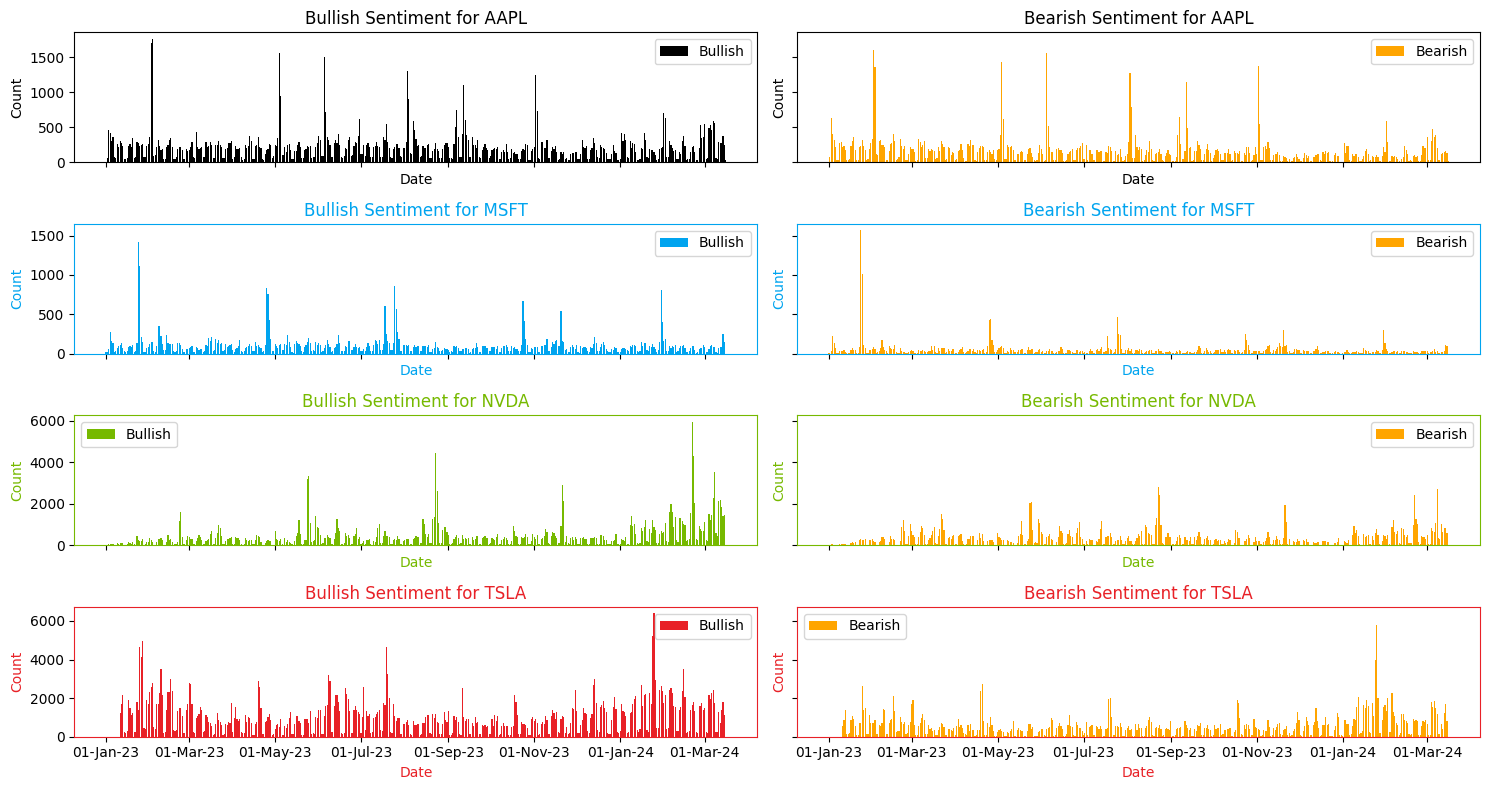

In [181]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd

# Assuming sentiment_counts_5 and ticker_colors are defined elsewhere

sentiment_counts = sentiment_counts_5
unique_tickers = sentiment_counts['Symbol'].unique()

# Determine the number of rows and columns for subplots
num_rows = len(unique_tickers)
num_cols = 2

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 8), sharey='row', sharex='col')

# Loop through unique tickers and plot sentiment counts
for i, stock_ticker in enumerate(unique_tickers):
    stock_data = sentiment_counts[sentiment_counts['Symbol'] == stock_ticker]
    
    # Plot bullish counts
    axes[i, 0].bar(stock_data['Date'], stock_data['Bullish'], label='Bullish', color=ticker_colors[stock_ticker])
    axes[i, 0].set_ylabel('Count', color=ticker_colors[stock_ticker])
    axes[i, 0].set_xlabel('Date', color=ticker_colors[stock_ticker])
    axes[i, 0].xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%y'))  # Format x-axis date labels
    axes[i, 0].set_title(f'Bullish Sentiment for {stock_ticker}', color=ticker_colors[stock_ticker])
    axes[i, 0].legend()
    for spine in axes[i, 0].spines.values():
        spine.set_edgecolor(ticker_colors[stock_ticker])

    # Plot bearish counts
    axes[i, 1].bar(stock_data['Date'], stock_data['Bearish'], label='Bearish', color='orange')
    axes[i, 1].set_ylabel('Count', color=ticker_colors[stock_ticker])
    axes[i, 1].set_xlabel('Date', color=ticker_colors[stock_ticker])
    axes[i, 1].xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%y'))  # Format x-axis date labels
    axes[i, 1].set_title(f'Bearish Sentiment for {stock_ticker}', color=ticker_colors[stock_ticker])
    axes[i, 1].legend()
    for spine in axes[i, 1].spines.values():
        spine.set_edgecolor(ticker_colors[stock_ticker])


plt.tight_layout()
plt.savefig('images/sentiment_counts_5.png', dpi=300)
plt.show()


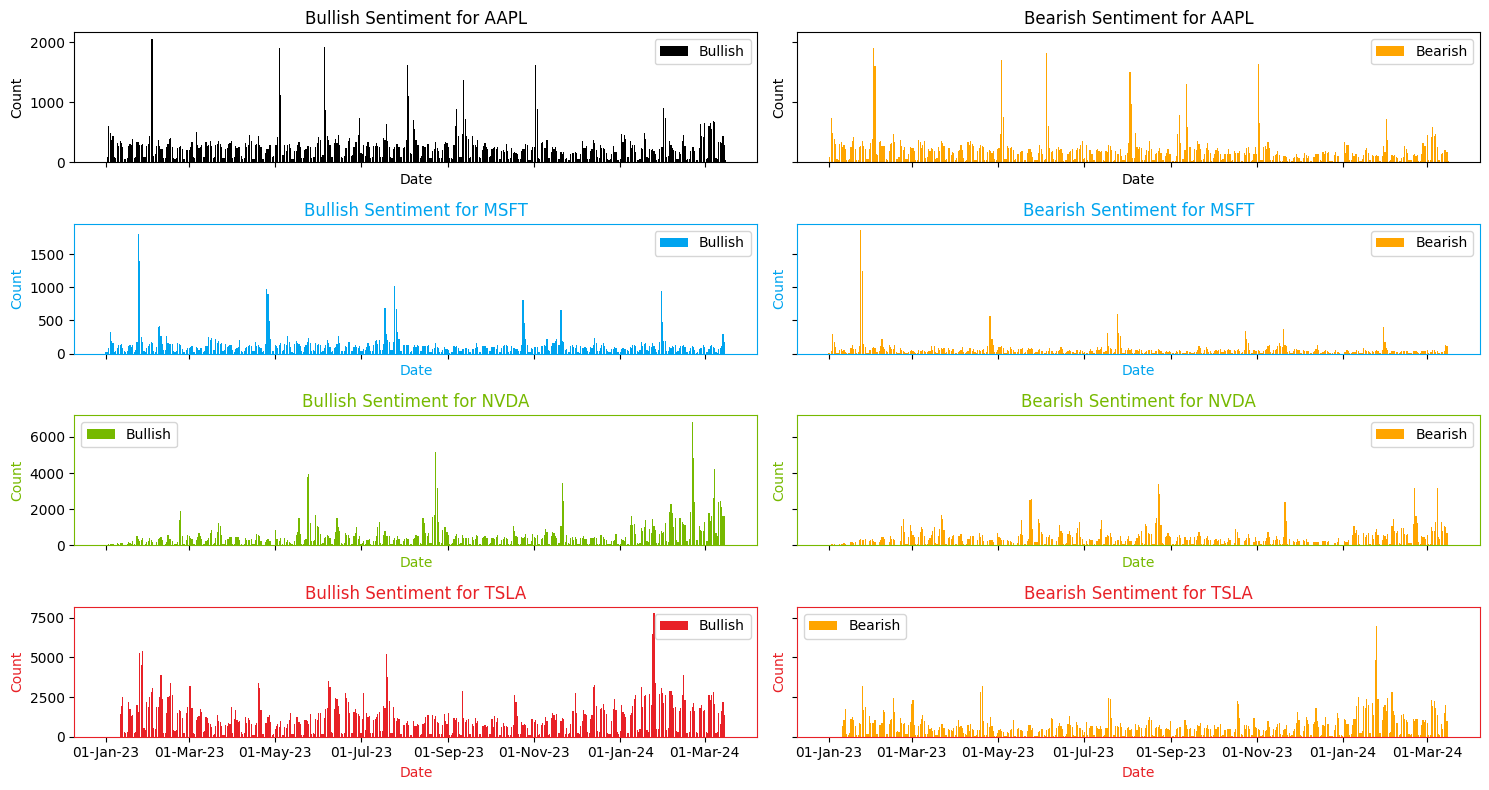

In [182]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd

# Assuming sentiment_counts_5 and ticker_colors are defined elsewhere

sentiment_counts = sentiment_counts_05
unique_tickers = sentiment_counts['Symbol'].unique()

# Determine the number of rows and columns for subplots
num_rows = len(unique_tickers)
num_cols = 2

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 8), sharey='row', sharex='col')

# Loop through unique tickers and plot sentiment counts
for i, stock_ticker in enumerate(unique_tickers):
    stock_data = sentiment_counts[sentiment_counts['Symbol'] == stock_ticker]
    
    # Plot bullish counts
    axes[i, 0].bar(stock_data['Date'], stock_data['Bullish'], label='Bullish', color=ticker_colors[stock_ticker])
    axes[i, 0].set_ylabel('Count', color=ticker_colors[stock_ticker])
    axes[i, 0].set_xlabel('Date', color=ticker_colors[stock_ticker])
    axes[i, 0].xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%y'))  # Format x-axis date labels
    axes[i, 0].set_title(f'Bullish Sentiment for {stock_ticker}', color=ticker_colors[stock_ticker])
    axes[i, 0].legend()
    for spine in axes[i, 0].spines.values():
        spine.set_edgecolor(ticker_colors[stock_ticker])

    # Plot bearish counts
    axes[i, 1].bar(stock_data['Date'], stock_data['Bearish'], label='Bearish', color='orange')
    axes[i, 1].set_ylabel('Count', color=ticker_colors[stock_ticker])
    axes[i, 1].set_xlabel('Date', color=ticker_colors[stock_ticker])
    axes[i, 1].xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%y'))  # Format x-axis date labels
    axes[i, 1].set_title(f'Bearish Sentiment for {stock_ticker}', color=ticker_colors[stock_ticker])
    axes[i, 1].legend()
    for spine in axes[i, 1].spines.values():
        spine.set_edgecolor(ticker_colors[stock_ticker])


plt.tight_layout()
plt.savefig('images/sentiment_counts_05.png', dpi=300)
plt.show()


In [43]:
import pandas as pd

# Assuming sentiment_count_5 and sentiment_count_05 are your DataFrames

# Merge the two DataFrames based on 'Symbol' and 'Date'
merged_df = pd.merge(sentiment_counts_5, sentiment_counts_05, on=['Symbol', 'Date'], suffixes=('_5', '_05'))
merged_df.head()


,Symbol,Date,Bearish_5,Bullish_5,Neutral_5,Bull_To_Bear_Ratio_5,Bearish_05,Bullish_05,Neutral_05,Bull_To_Bear_Ratio_05
0,AAPL,2023-01-02,71,62,97,0.873239,91,83,56,0.912088
1,AAPL,2023-01-03,627,457,589,0.728868,741,599,333,0.808367
2,AAPL,2023-01-04,402,418,364,1.039801,479,495,210,1.033403
3,AAPL,2023-01-05,313,307,319,0.980831,384,377,178,0.981771
4,AAPL,2023-01-06,221,356,290,1.610860,297,431,139,1.451178


In [45]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1750 entries, 0 to 1749
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Symbol                 1750 non-null   object        
 1   Date                   1750 non-null   datetime64[ns]
 2   Bearish_5              1750 non-null   int64         
 3   Bullish_5              1750 non-null   int64         
 4   Neutral_5              1750 non-null   int64         
 5   Bull_To_Bear_Ratio_5   1750 non-null   float64       
 6   Bearish_05             1750 non-null   int64         
 7   Bullish_05             1750 non-null   int64         
 8   Neutral_05             1750 non-null   int64         
 9   Bull_To_Bear_Ratio_05  1750 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(6), object(1)
memory usage: 136.8+ KB


In [152]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df and you have a ticker_color dictionary
df = merged_df[merged_df["Symbol"]!="TSLA"]
df = merged_df

# Extract month from the 'Date' column
df['Month'] = df['Date'].dt.strftime("%b-%Y")

# Group by 'Symbol' and 'Month', and aggregate the sum of 'Bullish_5' and 'Bullish_05'
monthly_bullish = df.groupby(['Symbol', 'Month']).agg({'Bullish_5': 'sum', 'Bullish_05': 'sum', 'Bearish_5': 'sum', 'Bearish_05': 'sum'}).reset_index()
monthly_bullish['Month'] = pd.to_datetime(monthly_bullish['Month'], format='%b-%Y')
monthly_bullish= monthly_bullish.sort_values(by='Month')

In [153]:
monthly_bullish.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 35 to 25
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Symbol      60 non-null     object        
 1   Month       60 non-null     datetime64[ns]
 2   Bullish_5   60 non-null     int64         
 3   Bullish_05  60 non-null     int64         
 4   Bearish_5   60 non-null     int64         
 5   Bearish_05  60 non-null     int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 3.3+ KB


In [154]:
monthly_bullish["Symbol_05"] = monthly_bullish["Symbol"] + "_05"

C:\Users\ratis\AppData\Local\Temp\ipykernel_9808\680424689.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, color="darkgreen")
C:\Users\ratis\AppData\Local\Temp\ipykernel_9808\680424689.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, color="darkred")


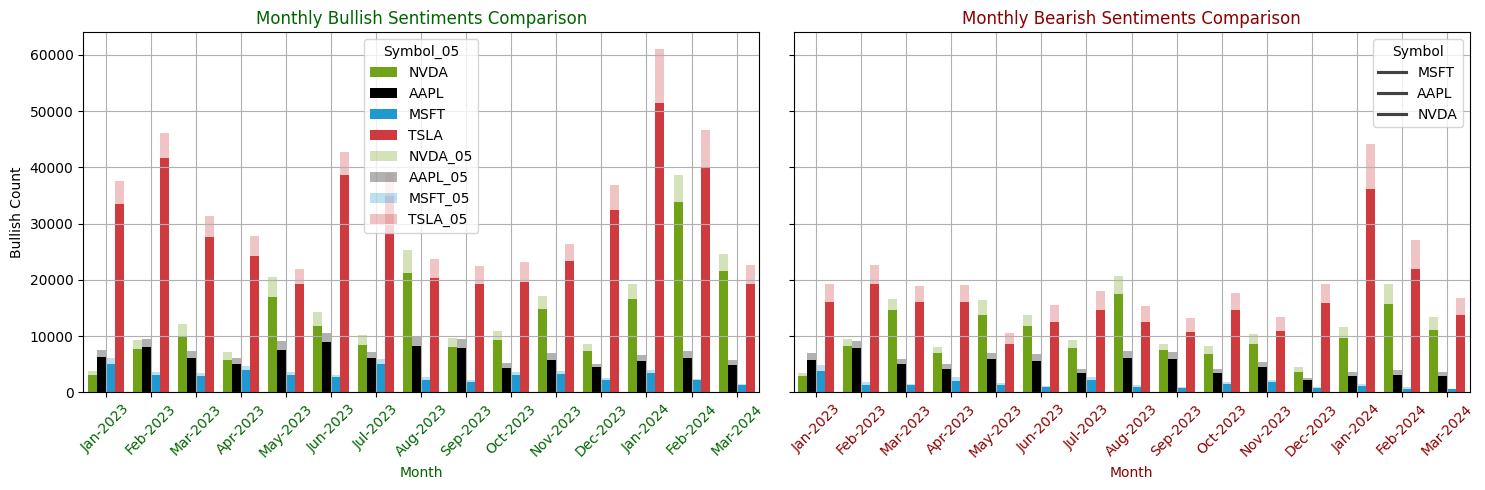

In [158]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

# Determine the number of rows and columns for subplots
num_rows = 1
num_cols = 2

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5), sharey=True, sharex=True)

monthly_bullish["dates"] = monthly_bullish.Month.dt.strftime('%b-%Y')

for i in range(num_rows):
    sns.barplot(data=monthly_bullish, x='dates', y='Bullish_5', hue='Symbol', ax=axes[0], palette=ticker_colors)
    sns.barplot(data=monthly_bullish, x='dates', y='Bullish_05', hue='Symbol_05', ax=axes[0], alpha=0.3, palette=ticker_colors_05)

    sns.barplot(data=monthly_bullish, x='dates', y='Bearish_5', hue='Symbol', ax=axes[1], palette=ticker_colors)
    sns.barplot(data=monthly_bullish, x='dates', y='Bearish_05', hue='Symbol_05', ax=axes[1], alpha=0.3, palette=ticker_colors_05)


for ax in axes:
    
    ax.grid(True)

    if ax == axes[0]:
        ax.set_xlabel('Month', color="darkgreen")
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, color="darkgreen")
        ax.set_ylabel('Bullish Count')
        ax.set_title('Monthly Bullish Sentiments Comparison', color="darkgreen")
    else:
        ax.set_xlabel('Month', color="darkred")
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, color="darkred")        
        ax.set_ylabel('Bearish Count', color="darkred")
        ax.set_title('Monthly Bearish Sentiments Comparison', color="darkred")
        ax.legend(title='Symbol')
# Customize the legend labels
plt.legend(title='Symbol', labels=['MSFT', 'AAPL', 'NVDA'])
plt.tight_layout()
plt.show()


In [40]:
sentiment_counts_5

CombinedSentiment_5,Symbol,Date,Bearish,Bullish,Neutral,Bull_To_Bear_Ratio
0,AAPL,2023-01-02,71,62,97,0.873239
1,AAPL,2023-01-03,627,457,589,0.728868
2,AAPL,2023-01-04,402,418,364,1.039801
3,AAPL,2023-01-05,313,307,319,0.980831
4,AAPL,2023-01-06,221,356,290,1.610860
...,...,...,...,...,...,...
1745,TSLA,2024-03-11,649,1294,937,1.993837
1746,TSLA,2024-03-12,387,713,506,1.842377
1747,TSLA,2024-03-13,1249,1389,1240,1.112090
1748,TSLA,2024-03-14,1707,1777,1733,1.041008


In [41]:
sentiment_counts_05

CombinedSentiment_05,Symbol,Date,Bearish,Bullish,Neutral,Bull_To_Bear_Ratio
0,AAPL,2023-01-02,91,83,56,0.912088
1,AAPL,2023-01-03,741,599,333,0.808367
2,AAPL,2023-01-04,479,495,210,1.033403
3,AAPL,2023-01-05,384,377,178,0.981771
4,AAPL,2023-01-06,297,431,139,1.451178
...,...,...,...,...,...,...
1745,TSLA,2024-03-11,814,1486,580,1.825553
1746,TSLA,2024-03-12,469,814,323,1.735608
1747,TSLA,2024-03-13,1475,1650,753,1.118644
1748,TSLA,2024-03-14,2009,2159,1049,1.074664


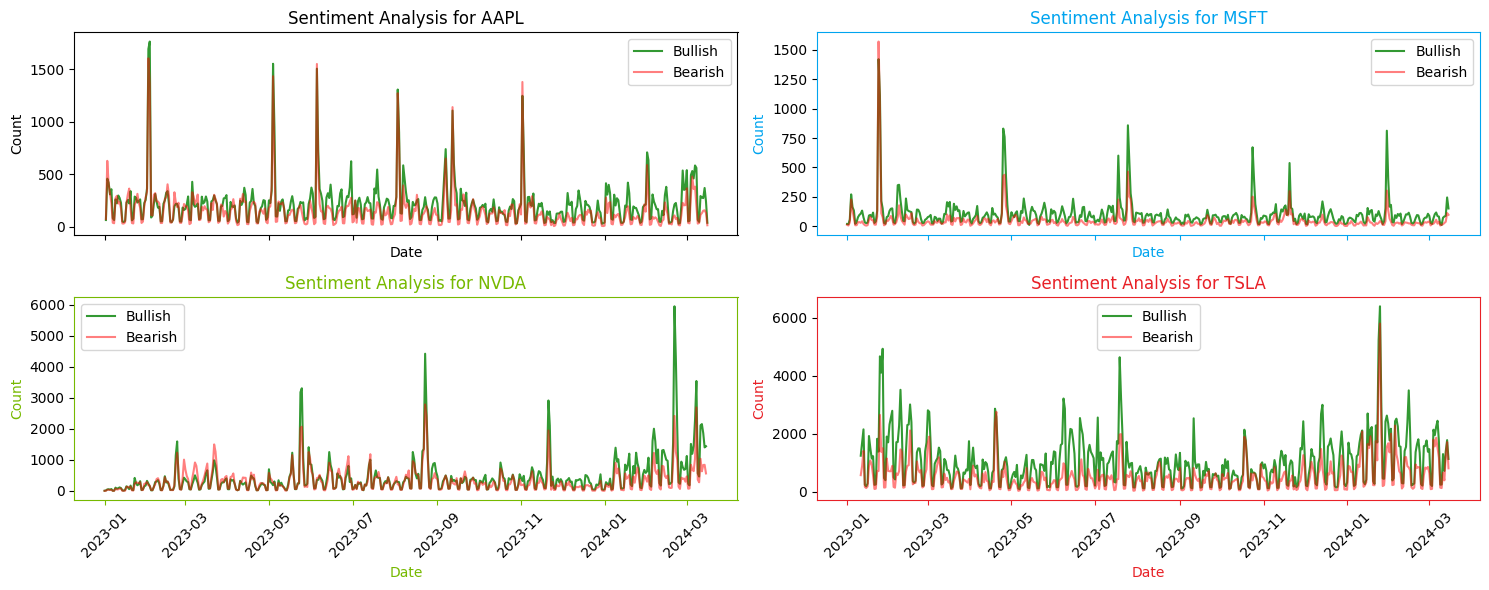

In [174]:
import matplotlib.pyplot as plt

# Get unique stock tickers
unique_tickers = sentiment_counts['Symbol'].unique()

# Determine the number of rows and columns for subplots
num_rows = 2
num_cols = 2

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 6), sharex=True)

# Flatten axes for easier iteration
axes = axes.flatten()

# Loop through unique tickers and plot sentiment counts
for i, stock_ticker in enumerate(unique_tickers):
    stock_data = sentiment_counts[sentiment_counts['Symbol'] == stock_ticker]
    row = i // num_cols
    col = i % num_cols
    
    # Plot bullish counts
    axes[i].plot(stock_data['Date'], stock_data['Bullish'], label='Bullish', color='green', alpha=0.8)
    
    # Plot bearish counts
    axes[i].plot(stock_data['Date'], stock_data['Bearish'], label='Bearish', color='red', alpha=0.5)
    axes[i].tick_params(axis='x', color=ticker_colors[stock_ticker], rotation=45)
    # # Plot neutral counts
    # axes[i].plot(stock_data['Date'], stock_data['Neutral'], label='Neutral', color='grey')
    for spine in axes[i].spines.values():
        spine.set_color(ticker_colors[stock_ticker])
    # Add labels and title
    # axes[i].set_xticklabels(stock_data['Date'], rotation=45, color=ticker_colors[stock_ticker])
    axes[i].set_xlabel('Date', color=ticker_colors[stock_ticker])
    axes[i].set_ylabel('Count', color=ticker_colors[stock_ticker])
    axes[i].set_title(f'Sentiment Analysis for {stock_ticker}', color=ticker_colors[stock_ticker])
    
    axes[i].legend()

plt.tight_layout()
plt.savefig('images/sentiment_count_combined.png', dpi=300)
plt.show()


In [184]:
tickers_str = ','.join([f"'{ticker}'" for ticker in tickers])
tickers_str

"'TSLA','AAPL','MSFT','NVDA'"

In [185]:
import sqlite3
import pandas as pd

# List of ticker symbols
# Connect to SQLite database
conn = sqlite3.connect('stock_data.db')


cursor = conn.cursor()
cursor.execute(f"SELECT StockName, Date, Close, Open, Volume, High, Low, MA5, MA10 FROM new_prices WHERE StockName in ({tickers_str}) and Date>='2023-01-01' and Date<='2024-03-15' ") #AND RSI IS NOT NULL AND MA20 IS NOT NULL
data = cursor.fetchall()

# Convert data to DataFrame
price_df = pd.DataFrame(data, columns=['Symbol' , 'Date', 'Close','Open', 'Volume', 'High', 'Low', 'MA5', 'MA10'])
price_df['Date'] = pd.to_datetime(price_df['Date'])
# Add ticker symbol column
# price_df['Symbol'] = ticker
    
# Close database connection
conn.close()


In [190]:
sentiment_counts = sentiment_counts_5

In [191]:
sentiment_counts['Date'] = pd.to_datetime(sentiment_counts['Date'])
sentiment_counts[ (sentiment_counts['Date']>='2023-1-1') & (sentiment_counts['Date']<='2024-3-15')]

CombinedSentiment_5,Symbol,Date,Bearish,Bullish,Neutral,Bull_To_Bear_Ratio
0,AAPL,2023-01-02,71,62,97,0.873239
1,AAPL,2023-01-03,627,457,589,0.728868
2,AAPL,2023-01-04,402,418,364,1.039801
3,AAPL,2023-01-05,313,307,319,0.980831
4,AAPL,2023-01-06,221,356,290,1.610860
...,...,...,...,...,...,...
1745,TSLA,2024-03-11,649,1294,937,1.993837
1746,TSLA,2024-03-12,387,713,506,1.842377
1747,TSLA,2024-03-13,1249,1389,1240,1.112090
1748,TSLA,2024-03-14,1707,1777,1733,1.041008


In [192]:
merge_df = price_df.merge(sentiment_counts, how="left",  on=["Symbol","Date"])
merge_df.head(100)

,Symbol,Date,Close,Open,Volume,High,Low,MA5,MA10,Bearish,Bullish,Neutral,Bull_To_Bear_Ratio
0,TSLA,2023-01-03,108.099998,118.470001,231402800,118.800003,104.639999,114.981999,124.865000,NaN,NaN,NaN,NaN
1,TSLA,2023-01-04,113.639999,109.110001,180389000,114.589996,107.519997,115.889999,121.242001,NaN,NaN,NaN,NaN
2,TSLA,2023-01-05,110.339996,110.510002,157986300,111.750000,107.160004,115.415999,118.496000,NaN,NaN,NaN,NaN
3,TSLA,2023-01-06,113.059998,103.000000,220911100,114.389999,101.809998,113.663998,116.044999,NaN,NaN,NaN,NaN
4,TSLA,2023-01-09,119.769997,118.959999,190284000,123.519997,117.110001,112.981998,115.486999,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,TSLA,2023-05-19,180.139999,177.169998,136024200,181.949997,176.309998,172.752002,171.329999,283.0,735.0,424.0,2.597173
96,TSLA,2023-05-22,188.869995,180.699997,132001400,189.320007,180.110001,177.256000,173.037999,294.0,944.0,517.0,3.210884
97,TSLA,2023-05-23,185.770004,186.199997,156952100,192.960007,185.259995,181.106000,174.700000,685.0,932.0,559.0,1.360584
98,TSLA,2023-05-24,182.899994,182.229996,137605100,184.220001,178.220001,182.913998,176.136000,642.0,904.0,507.0,1.408100


In [193]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1204 entries, 0 to 1203
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Symbol              1204 non-null   object        
 1   Date                1204 non-null   datetime64[ns]
 2   Close               1204 non-null   float64       
 3   Open                1204 non-null   float64       
 4   Volume              1204 non-null   int64         
 5   High                1204 non-null   float64       
 6   Low                 1204 non-null   float64       
 7   MA5                 1204 non-null   float64       
 8   MA10                1204 non-null   float64       
 9   Bearish             1198 non-null   float64       
 10  Bullish             1198 non-null   float64       
 11  Neutral             1198 non-null   float64       
 12  Bull_To_Bear_Ratio  1198 non-null   float64       
dtypes: datetime64[ns](1), float64(10), int64(1), obj

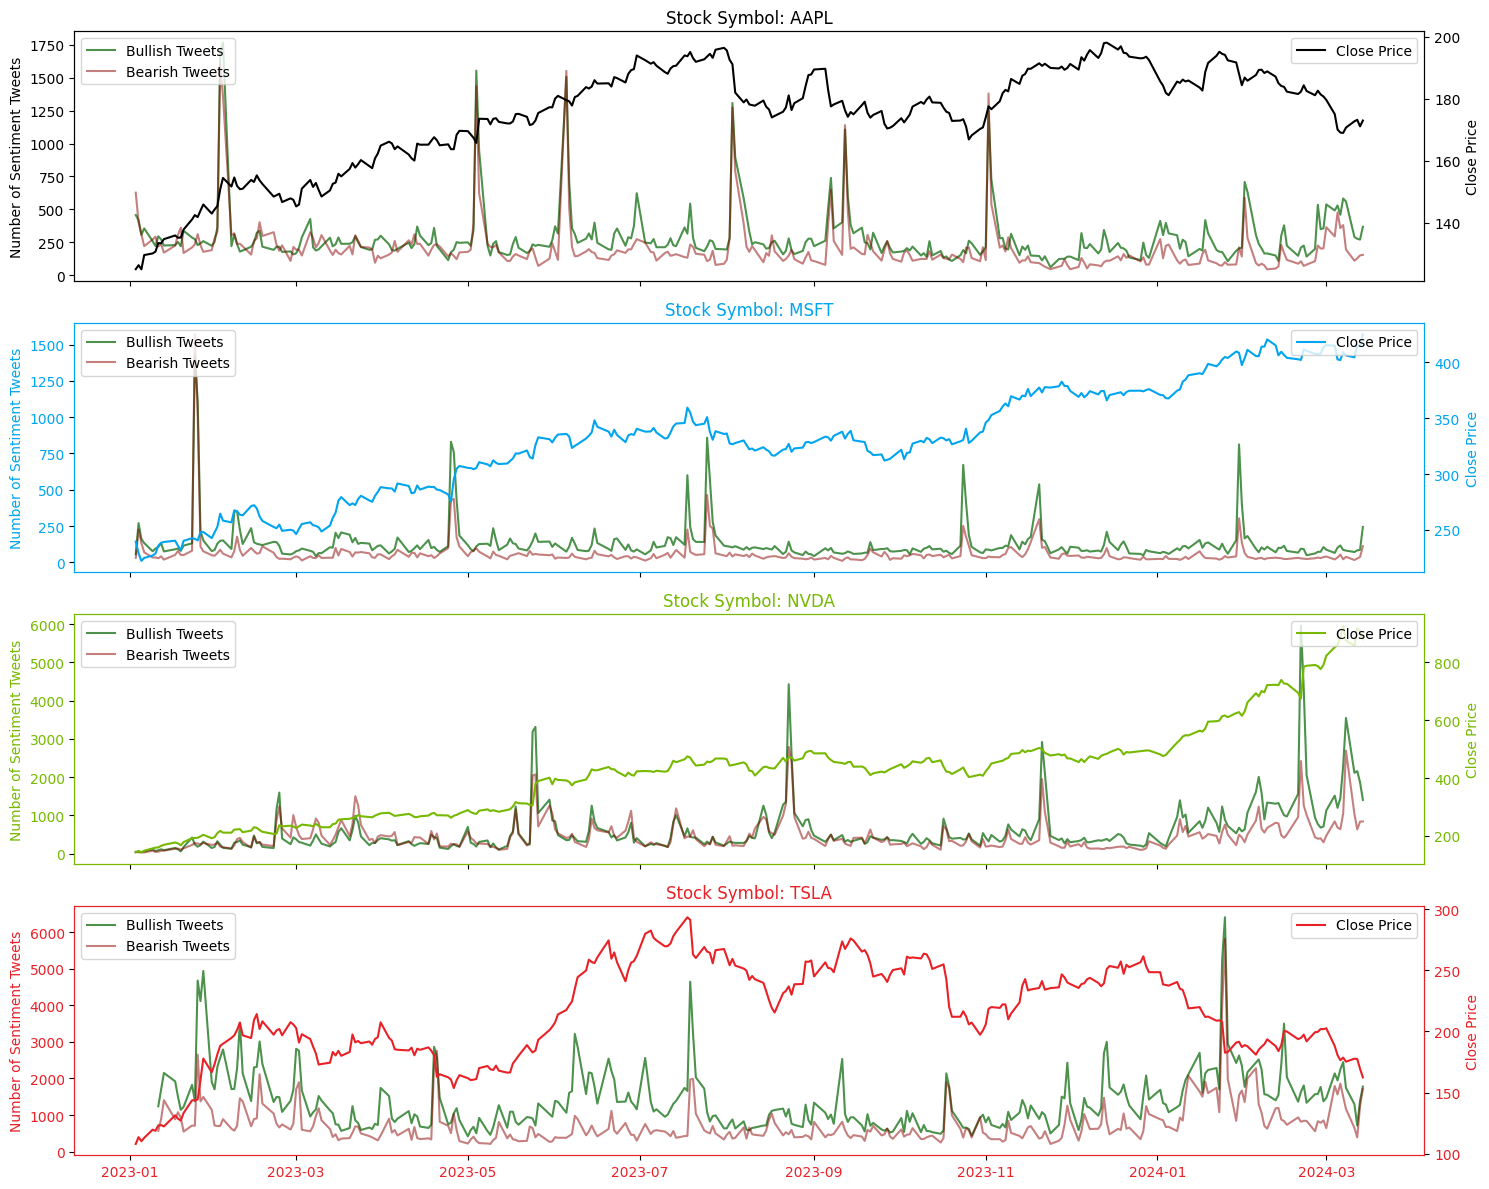

In [205]:
import matplotlib.pyplot as plt

# List of unique stock symbols
symbols = merge_df['Symbol'].unique()

# Set up subplots
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(15, 12), sharex=True)

# Flatten axes for easier indexing
axes = axes.flatten()

# Loop through each stock symbol
for i, symbol in enumerate(sorted(symbols)):
    # Filter data for the current stock symbol
    stock_data = merge_df[merge_df['Symbol'] == symbol]
    
    # Plot sentiment tweets on the first y-axis
    ax1 = axes[i]
    ax1.plot(stock_data['Date'], stock_data['Bullish'], color='darkgreen', label='Bullish Tweets', alpha=0.7)
    ax1.plot(stock_data['Date'], stock_data['Bearish'], color='darkred', label='Bearish Tweets', alpha=0.5)
    # ax1.plot(stock_data['Date'], stock_data['Neutral'], color='grey', label='Neutral Tweets')
    ax1.set_ylabel('Number of Sentiment Tweets', color=ticker_colors[symbol])
    ax1.set_title(f'Stock Symbol: {symbol}', color=ticker_colors[symbol])
    
    ax1.tick_params(axis='y', labelcolor=ticker_colors[symbol])
    ax1.tick_params(axis='x', labelcolor=ticker_colors[symbol])

    # Create a secondary y-axis for the close price of the stock
    ax2 = ax1.twinx()
    ax2.plot(stock_data['Date'], stock_data['Close'], color=ticker_colors[symbol], label='Close Price')
    ax2.set_ylabel('Close Price', color=ticker_colors[symbol])
    
    # Add legend
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    ax2.tick_params(axis='y', labelcolor=ticker_colors[symbol])
    ax2.tick_params(axis='x', labelcolor=ticker_colors[symbol])
    
    for spine in ax1.spines.values():
        spine.set_color(ticker_colors[symbol])
    for spine in ax2.spines.values():
        spine.set_color(ticker_colors[symbol])

# Adjust layout
plt.tight_layout()
plt.savefig('images/sentiment_tweets_stock_price.png', dpi=300  )
# Show plot
plt.show()


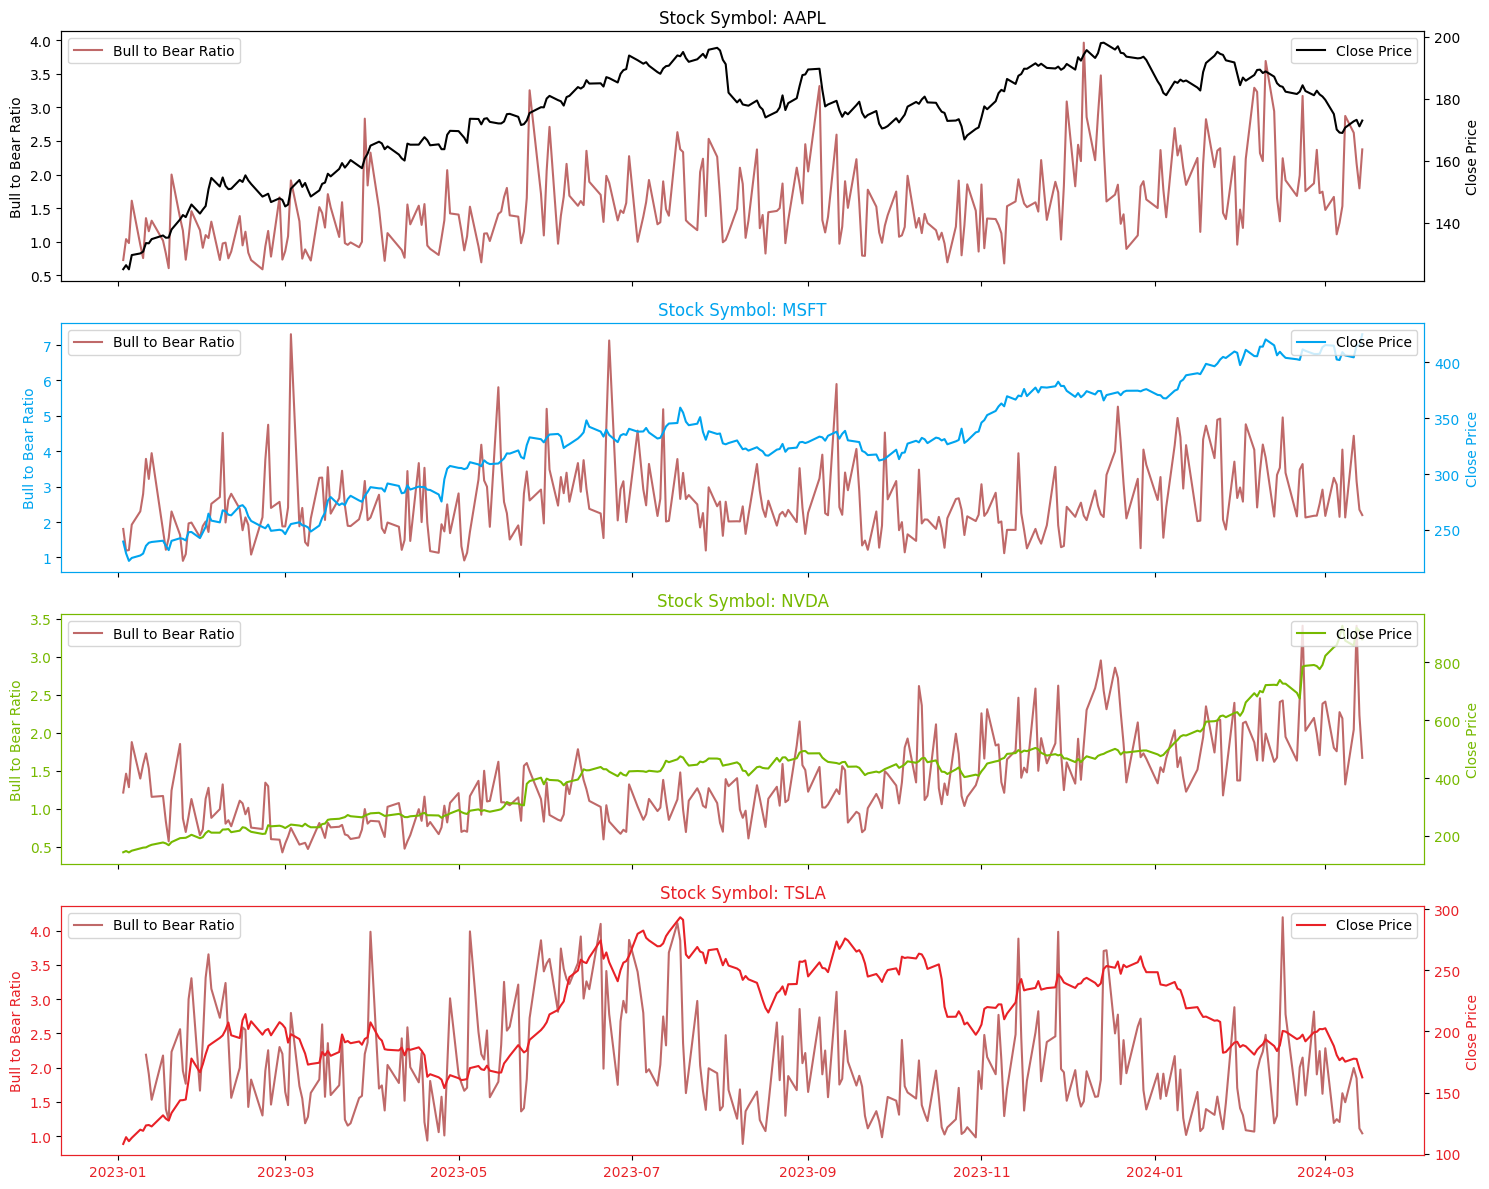

In [220]:
import matplotlib.pyplot as plt

# List of unique stock symbols
symbols = merge_df['Symbol'].unique()

# Set up subplots
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(15, 12), sharex=True)

# Flatten axes for easier indexing
axes = axes.flatten()

# Loop through each stock symbol
for i, symbol in enumerate(sorted(symbols)):
    # Filter data for the current stock symbol
    stock_data = merge_df[merge_df['Symbol'] == symbol]
    
    # Plot sentiment tweets on the first y-axis
    ax1 = axes[i]
    ax1.plot(stock_data['Date'], stock_data['Bull_To_Bear_Ratio'], color='brown', label='Bull to Bear Ratio', alpha=0.7)
    # ax1.plot(stock_data['Date'], stock_data['Neutral'], color='grey', label='Neutral Tweets')
    ax1.set_ylabel('Bull to Bear Ratio', color=ticker_colors[symbol])
    ax1.set_title(f'Stock Symbol: {symbol}', color=ticker_colors[symbol])
    
    ax1.tick_params(axis='y', labelcolor=ticker_colors[symbol])
    ax1.tick_params(axis='x', labelcolor=ticker_colors[symbol])

    # Create a secondary y-axis for the close price of the stock
    ax2 = ax1.twinx()
    ax2.plot(stock_data['Date'], stock_data['Close'], color=ticker_colors[symbol], label='Close Price')
    ax2.set_ylabel('Close Price', color=ticker_colors[symbol])
    
    # Add legend
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    ax2.tick_params(axis='y', labelcolor=ticker_colors[symbol])
    ax2.tick_params(axis='x', labelcolor=ticker_colors[symbol])
    
    for spine in ax1.spines.values():
        spine.set_color(ticker_colors[symbol])
    for spine in ax2.spines.values():
        spine.set_color(ticker_colors[symbol])

# Adjust layout
plt.tight_layout()
plt.savefig('images/bull_to_bear_ratio.png', dpi=300  )
# Show plot
plt.show()


In [213]:
merge_df

,Symbol,Date,Close,Open,Volume,High,Low,MA5,MA10,Bearish,Bullish,Neutral,Bull_To_Bear_Ratio
0,TSLA,2023-01-03,108.099998,118.470001,231402800,118.800003,104.639999,114.981999,124.865000,NaN,NaN,NaN,NaN
1,TSLA,2023-01-04,113.639999,109.110001,180389000,114.589996,107.519997,115.889999,121.242001,NaN,NaN,NaN,NaN
2,TSLA,2023-01-05,110.339996,110.510002,157986300,111.750000,107.160004,115.415999,118.496000,NaN,NaN,NaN,NaN
3,TSLA,2023-01-06,113.059998,103.000000,220911100,114.389999,101.809998,113.663998,116.044999,NaN,NaN,NaN,NaN
4,TSLA,2023-01-09,119.769997,118.959999,190284000,123.519997,117.110001,112.981998,115.486999,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199,NVDA,2024-03-08,875.280029,951.380005,113299600,974.000000,865.059998,880.196008,836.945001,2692.0,3546.0,2844.0,1.317236
1200,NVDA,2024-03-11,857.739990,864.289978,67836400,887.969971,841.659973,881.270007,843.627002,1036.0,2113.0,1295.0,2.039575
1201,NVDA,2024-03-12,919.130005,880.489990,66807500,919.599976,861.500000,893.168005,856.839001,633.0,2156.0,1180.0,3.406003
1202,NVDA,2024-03-13,908.880005,910.549988,63571300,915.039978,884.349976,897.544006,870.064001,836.0,1863.0,1256.0,2.228469


In [215]:
import plotly.graph_objects as go

# List of unique stock symbols
symbols = merge_df['Symbol'].unique()
symbols = ['TSLA']

# Create subplots
fig = go.Figure()

# Loop through each stock symbol
for symbol in sorted(symbols):
    # Filter data for the current stock symbol
    stock_data = merge_df[merge_df['Symbol'] == symbol]
    
    # Plot sentiment tweets
    fig.add_trace(go.Scatter(x=stock_data['Date'], y=stock_data['Bull_To_Bear_Ratio'], 
                             mode='lines', name='Bullish Tweets', line=dict(color='darkgreen', width=1)))
    # fig.add_trace(go.Scatter(x=stock_data['Date'], y=stock_data['Bull_To_Bear_Ratio'], 
    #                          mode='lines', name='Bearish Tweets', line=dict(color='darkred', width=1)))
    # Add close price on secondary y-axis
    fig.add_trace(go.Scatter(x=stock_data['Date'], y=stock_data['Close'], 
                             mode='lines', name='Close Price', yaxis='y2', line=dict(color=ticker_colors[symbol], width=1)))
    
    # Update layout
    fig.update_layout(title=f"Stock Symbol: {symbol}",
                      xaxis=dict(title='Date'),
                      yaxis=dict(title='Number of Sentiment Tweets', color='darkgreen'),
                      yaxis2=dict(title='Close Price', color='blue', overlaying='y', side='right'),
                      legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01),
                      )
    # Update x-axis tick color and rotation
    fig.update_xaxes(tickfont=dict(color='darkgreen', size=10), tickangle=45)
    
# Show plot
fig.show()


In [211]:
import plotly.graph_objects as go

# List of unique stock symbols
symbols = merge_df['Symbol'].unique()

# Create subplots
fig = go.Figure()

# Loop through each stock symbol
for symbol in sorted(symbols):
    # Filter data for the current stock symbol
    stock_data = merge_df[merge_df['Symbol'] == symbol]
    
    # Plot sentiment tweets
    fig.add_trace(go.Scatter(x=stock_data['Date'], y=stock_data['Bullish'], 
                             mode='lines', name=f'{symbol} - Bullish Tweets', visible='legendonly',
                             line=dict(color='darkgreen', width=1)))
    fig.add_trace(go.Scatter(x=stock_data['Date'], y=stock_data['Bearish'], 
                             mode='lines', name=f'{symbol} - Bearish Tweets', visible='legendonly',
                             line=dict(color='darkred', width=1)))
    # Add close price on secondary y-axis
    fig.add_trace(go.Scatter(x=stock_data['Date'], y=stock_data['Close'], 
                             mode='lines', name=f'{symbol} - Close Price', visible='legendonly',
                             yaxis='y2', line=dict(color='blue', width=1)))
    
# Add dropdown menu
buttons = []
for symbol in symbols:
    buttons.append(dict(method='update',
                        label=symbol,
                        args=[{'visible': [(s in [f'{symbol} - Bullish Tweets',
                                                    f'{symbol} - Bearish Tweets',
                                                    f'{symbol} - Close Price']) for s in fig.data]},
                              {'title': f"Stock Symbol: {symbol}"}]))

fig.update_layout(updatemenus=[{'buttons': buttons,
                                'direction': 'down',
                                'showactive': True,
                                'x': 0.05,
                                'xanchor': 'left',
                                'y': 1.15,
                                'yanchor': 'top'}])

# Update layout
fig.update_layout(title=f"Stock Symbol: {symbols[0]}",
                  xaxis=dict(title='Date'),
                  yaxis=dict(title='Number of Sentiment Tweets', color='darkgreen'),
                  yaxis2=dict(title='Close Price', color='blue', overlaying='y', side='right'),
                  legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01),
                  )
# Update x-axis tick color and rotation
fig.update_xaxes(tickfont=dict(color='darkgreen', size=10), tickangle=45)

# Show plot
fig.show()



In [ ]:
import matplotlib.pyplot as plt

# List of unique stock symbols
symbols = merge_df['Symbol'].unique()

# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Flatten axes for easier indexing
axes = axes.flatten()

# Loop through each stock symbol
for i, symbol in enumerate(symbols):
    # Filter data for the current stock symbol
    stock_data = merge_df[merge_df['Symbol'] == symbol]
    
    # Calculate price change as the difference between Close and Open prices
    stock_data['Price_Change'] = stock_data['Close'] - stock_data['Open']
    
    # Create a scatter plot
    axes[i].scatter(stock_data['Bull/Bear Ratio'], stock_data['Price_Change'], color=ticker_colors[symbol], alpha=0.5)
    
    # Add title and labels
    axes[i].set_title(f'{symbol}: Sentiment Score vs. Price Change', color=ticker_colors[symbol])
    axes[i].set_xlabel('Bull/Bear Ratio')
    axes[i].set_ylabel('Price Change')

# Adjust layout
plt.tight_layout()
plt.savefig('images/price_change_bull_bear_ratio.png', dpi=300)
# Show plot
plt.show()


In [ ]:
# Count the number of each sentiment label at the Symbol level
symbol_sentiment_counts = processed_df.groupby(['Symbol', 'Combined Sentiment']).agg({"Sentiment_Vader" : 'count', "SentimentScore" : "mean"}).reset_index()
symbol_sentiment_counts

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt



# # Create a custom palette using brand_colors
# custom_palette = [brand_colors[symbol] for symbol in symbol_sentiment_counts['Symbol'].unique()]

# # Create a figure and axes with a 2 by 2 grid layout
# fig, axs = plt.subplots(2, 2, figsize=(15, 8))

# # Bar plot
# sns.barplot(x=symbol_sentiment_counts["Combined Sentiment"], y=symbol_sentiment_counts["Sentiment_Vader"], ax=axs[0, 0], hue=symbol_sentiment_counts["Symbol"], palette=custom_palette)
# axs[0, 0].set_title('Distribution of Sentiment Labels')
# axs[0, 0].set_xlabel('Sentiment Label')
# axs[0, 0].set_ylabel('Count')

# # # Box plot
# # sns.boxplot(x='Sentiment_Vader', y='SentimentScore', data=sentiment_df, ax=axs[0, 1])
# sns.boxplot(x=symbol_sentiment_counts["Combined Sentiment"], y=symbol_sentiment_counts["SentimentScore"], ax=axs[0, 1], hue=symbol_sentiment_counts["Symbol"], palette=custom_palette)
# axs[0, 1].set_title('Comparison of Sentiment Scores by Sentiment Label')
# axs[0, 1].set_xlabel('Sentiment Label')
# axs[0, 1].set_ylabel('Sentiment Score')

# # Histogram
# sns.histplot(data=processed_df, x='SentimentScore', bins=20, kde=True, ax=axs[1, 0], palette=custom_palette, hue=processed_df["Symbol"])
# axs[1, 0].set_title('Distribution of Sentiment Scores')
# axs[1, 0].set_xlabel('Sentiment Score')
# axs[1, 0].set_ylabel('Frequency')

# # # # Pie chart
# # data = symbol_sentiment_counts["Sentiment_Vader"]
# # labels = symbol_sentiment_counts["Combined Sentiment"]
# # colors = custom_palette
# # axs[1, 1].pie(data, labels=labels, colors=colors, autopct='%.0f%%', hue=symbol_sentiment_counts["Symbol"])
# # axs[1, 1].set_title('Distribution of Sentiment Labels')

# # Adjust layout
# plt.tight_layout()

# # Show plot
# plt.show()


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
# Combine all text into a single string
text = ' '.join(processed_df['CleanBody'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100, min_font_size = 10, collocations=False).generate(text)

# Plot the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Cleaned Body Text')
plt.axis('off')
plt.show()


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

# Combine all text into a single string
text = ' '.join(processed_df['CleanBody'])

# Create a WordCloud object
wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='white', 
    max_words=100, 
    min_font_size=10, 
    collocations=False,
    colormap='viridis',  # Change the colormap for better color scheme
    contour_width=1,  # Add contour around the word cloud
    contour_color='black',  # Set contour color
    mask=None,  # Use mask for custom shape if desired
).generate(text)

# Plot the WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Cleaned Body Text', fontsize=18, color='navy', pad=20)  # Adjust title appearance
plt.axis('off')
plt.tight_layout()  # Improve layout
plt.savefig('images/word_cloud_aggregate.png', dpi=300, bbox_inches='tight', pad_inches=0.2, transparent=True)  # Save as PNG with transparency
plt.show()


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

# Get unique stock tickers
unique_tickers = processed_df['Symbol'].unique()

# Determine the number of rows and columns for subplots
num_rows = 2
num_cols = 2

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Flatten axes for easier iteration
axes = axes.flatten()

# Loop through unique tickers and plot word clouds
for i, stock_ticker in enumerate(unique_tickers):
    # Filter data for the current stock ticker
    text = ' '.join(processed_df[processed_df['Symbol'] == stock_ticker]['CleanBody'])
    
    # Create a WordCloud object
    wordcloud = WordCloud(
        width=400, 
        height=200, 
        background_color='white', 
        max_words=100, 
        min_font_size=10, 
        collocations=False,
        colormap='viridis',
        contour_width=1,
        contour_color='black',
        mask=None,
    ).generate(text)
    
    # Plot the WordCloud
    ax = axes[i]
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(f'Word Cloud for {stock_ticker}', fontsize=18, color=ticker_colors[stock_ticker], pad=20)
    ax.axis('off')
    
    # Manually add grid lines
    ax.grid(True, color='gray', linestyle='--')

plt.tight_layout()
plt.savefig('images/word_cloud_stock_level.png', dpi=300)
plt.show()


In [ ]:
processed_df.info()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named tweet_df with columns ['Date', 'Volume']
df = processed_df.copy()
df.set_index('Date', inplace=True)
# Step 1: Compute daily tweet volumes
# daily_tweet_volumes = df.groupby('Date').size()
# daily_tweet_volumes.head()
# daily_tweet_volumes.info()

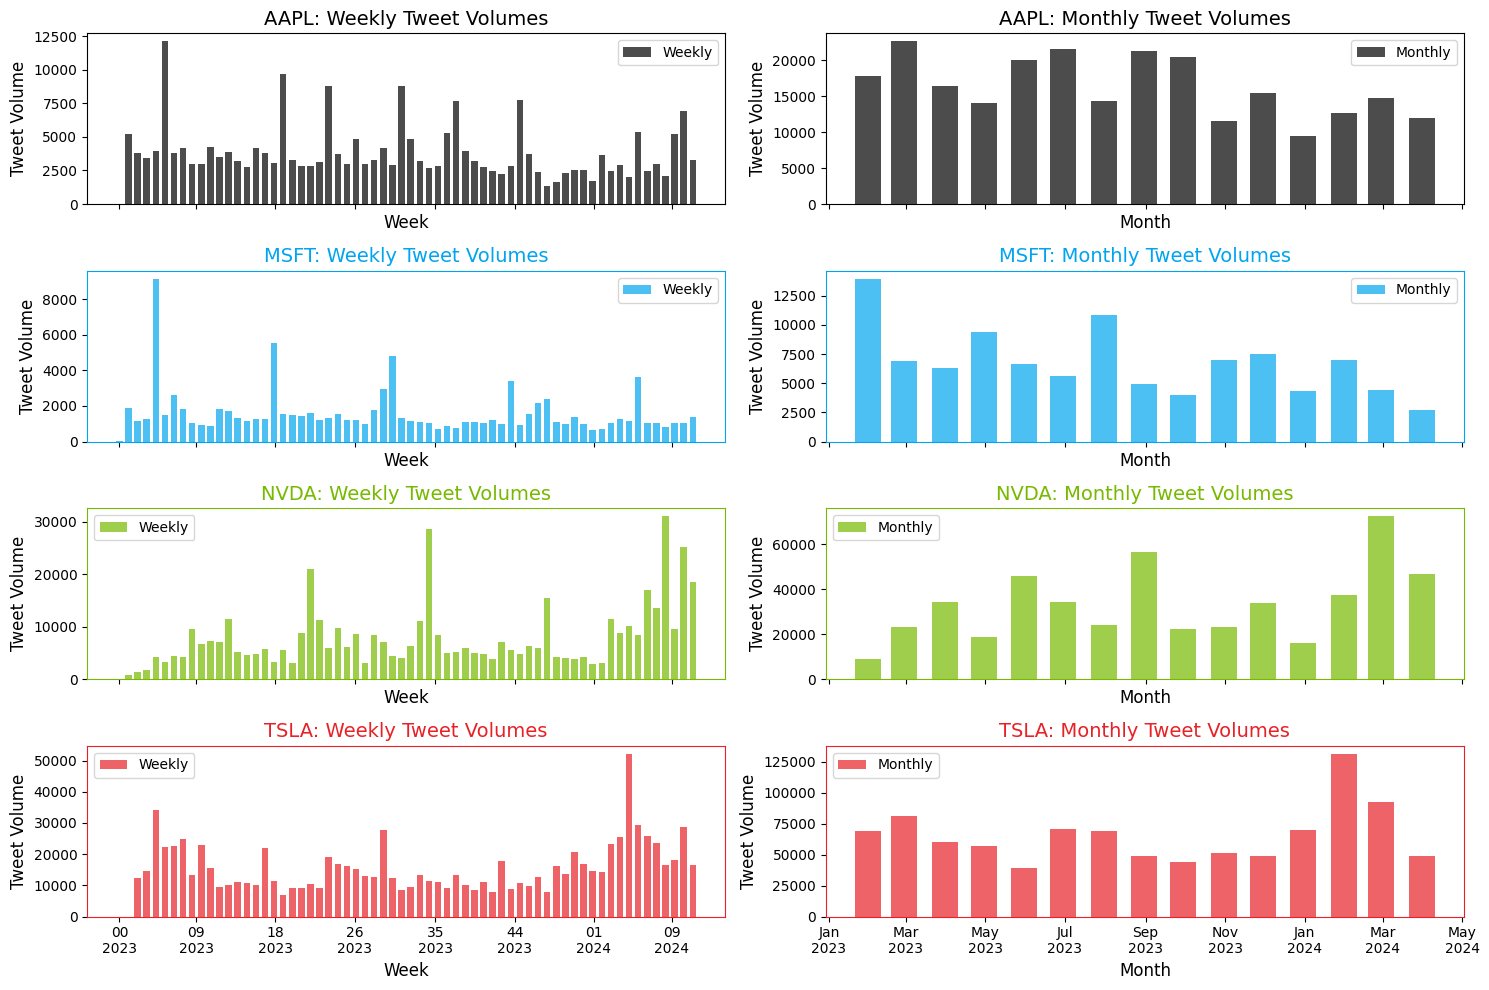

In [180]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
# Assuming you have a DataFrame named processed_df with columns ['Symbol', 'Date', 'Volume']

# Step 1: Define the number of rows and columns for subplots
num_rows = len(processed_df['Symbol'].unique())
num_cols = 2

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10), sharex="col")

# Loop through each stock symbol
for i, symbol in enumerate(sorted(processed_df['Symbol'].unique())):
    # Filter data for the current stock symbol
    stock_df = processed_df[processed_df['Symbol'] == symbol]
    
    
    
    # Set 'Date' column as the index
    stock_df.set_index('Date', inplace=True)
    
    # Compute daily tweet volumes
    daily_tweet_volumes = stock_df.groupby(stock_df.index.date).size()
    daily_tweet_volumes.index = pd.to_datetime(daily_tweet_volumes.index)
    
    # Resample by week and month for bar plot
    weekly_tweet_volumes = daily_tweet_volumes.resample('W').sum()
    monthly_tweet_volumes = daily_tweet_volumes.resample('ME').sum()
    
    # # # Plot daily tweet volume over time
    # # ax = axes[i, 0]
    # # ax.plot(daily_tweet_volumes.index, daily_tweet_volumes.values, color=ticker_colors[symbol])
    # # ax.set_title(f'{symbol}: Daily Tweet Volume Over Time', fontsize=14, color=ticker_colors[symbol])
    # # ax.set_xlabel('Date', fontsize=12)
    # # ax.set_ylabel('Tweet Volume', fontsize=12)
    # # ax.set_xticklabels(stock_data['Date'], rotation=45)
    
    # ax.grid(True)
    
    # Plot weekly tweet volumes
    ax = axes[i, 0]
    ax.bar(weekly_tweet_volumes.index, weekly_tweet_volumes.values, width=5, alpha=0.7, label='Weekly', color=ticker_colors[symbol])
    ax.set_title(f'{symbol}: Weekly Tweet Volumes', fontsize=14, color=ticker_colors[symbol])
    ax.set_xlabel('Week', fontsize=12)
    ax.set_ylabel('Tweet Volume', fontsize=12)
    ax.legend()
    ax.xaxis.set_major_formatter(DateFormatter('%W\n%Y'))
    ax.grid(False)

    for spine in ax.spines.values():
        spine.set_color(ticker_colors[symbol])

    # Plot monthly tweet volumes
    ax = axes[i, 1]
    ax.bar(monthly_tweet_volumes.index, monthly_tweet_volumes.values, width=20, alpha=0.7, label='Monthly', color=ticker_colors[symbol])
    ax.set_title(f'{symbol}: Monthly Tweet Volumes', fontsize=14, color=ticker_colors[symbol])
    ax.set_xlabel('Month', fontsize=12)
    ax.set_ylabel('Tweet Volume', fontsize=12)
    ax.legend()
    ax.xaxis.set_major_formatter(DateFormatter('%b\n%Y'))
    ax.grid(False)
    for spine in ax.spines.values():
        spine.set_color(ticker_colors[symbol])

# Hide empty subplots if necessary
for j in range(len(processed_df['Symbol'].unique()), num_cols):
    axes[0, j].axis('off')

plt.tight_layout()
plt.savefig('images/tweet_volume_bar_plot.png', dpi=300)
plt.show()


In [ ]:
sentiment_df

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named sentiment_df with columns ['Symbol', 'Date', 'Sentiment_Score']



# Step 2: Plot the data
# Get unique stock symbols
unique_symbols = sentiment_df['Symbol'].unique()

# Create a line plot for each stock symbol
plt.figure(figsize=(10, 6))
for symbol in unique_symbols:
    stock_data = sentiment_df[sentiment_df['Symbol'] == symbol]
    plt.plot(stock_data.index, stock_data['SentimentScore'], label=symbol)

plt.title('Time-Series Plot of Sentiment Score')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import re

def remove_tickers(tweet):
    # Define a regular expression pattern to match stock tickers (assuming they are uppercase and followed by whitespace or end of line)
    pattern = r'\b(?:AMZN|AAPL|TSLA|GOOG|NVDA|QQQ|MSFT)\b\s*'
    # Replace stock tickers with an empty string
    cleaned_tweet = re.sub(pattern, '', tweet, flags=re.IGNORECASE)
    return cleaned_tweet

processed_df["CleanBody2"] = processed_df["CleanBody"].apply(remove_tickers)  


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all text into a single string
text = ' '.join(processed_df['CleanBody2'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False).generate(text)

# Plot the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Cleaned Body Text')
plt.axis('off')
plt.show()


In [ ]:
def plot_wordcloud(series):

    from wordcloud import WordCloud

    wordcloud = WordCloud(collocations=False).generate(' '.join(series.astype(str)))

    

    plt.imshow(wordcloud, interpolation='bilinear')

    plt.axis("off")

plot_wordcloud(processed_df['CleanBody'])

In [ ]:

sliced_df = processed_df[processed_df["Sentiment_Vader"]=="Bearish"].nlargest(500,"SentimentScore")
plot_wordcloud(sliced_df["CleanBody"])


In [ ]:

sliced_df = processed_df[processed_df["Sentiment_Vader"]=="Bullish"].nlargest(500,"SentimentScore")
plot_wordcloud(sliced_df["CleanBody"])

In [ ]:
merge_df.head()

In [ ]:
sentiment_df

In [ ]:
# merge_df = price_df.merge(sentiment_df, how="left",  on=["Symbol","Date"])
# merge_df.head(100)

In [ ]:
merge_df.to_csv('merge_df.csv', index=False)

In [ ]:
sentiment_df[sentiment_df["Sentiment"].isna()]

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
from IPython.core.display import display
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
sentiment_df[sentiment_df["ID"]==522356]

In [ ]:
text = sentiment_df[sentiment_df["ID"]==522356]
display(text)

display(analyzer.polarity_scores(text)['compound'])

In [ ]:
text_to_check = 'Just follow the updates and alerts after joining.'
contains_text_mask = df['Body'].str.contains(text_to_check)
rows_with_text = df[contains_text_mask]

In [ ]:
pd.options.display.max_colwidth=None
pd.options.display.max_rows=None


In [ ]:
contains_text_mask

In [ ]:
print(sentiment_df.shape)
sentiment_df = sentiment_df[~contains_text_mask]
print(sentiment_df.shape)